# Machine Learning Classification

## Telecom Customer Churn Prediction Project

*We use logistic regression to predict churn*

**Dataset** : <https://www.kaggle.com/datasets/blastchar/telco-customer-churn>



### Data Preparation

- Download the data, read it with pandas
- Make column names and values look uniform
- Look for churn column and convert to 0 and 1s

In [1]:
#importing libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
#read the data
df = pd.read_csv("./WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [4]:
df.columns = df.columns.str.lower().str.replace(' ','_')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


In [6]:
#convert the totalcharges column to numeric
df['totalcharges'] = pd.to_numeric(df['totalcharges'],errors = 'coerce')

df['totalcharges'] = df['totalcharges'].fillna(0)

In [7]:
#clean string columns
string_columns = list(df.dtypes[df.dtypes==object].index)

for s in string_columns:
    df[s]=df[s].str.lower().str.replace(' ','_')

In [8]:
#clean churn column
df['churn']=(df['churn']=='yes').astype(int)

### Data Validation

Split the data into training, validation and testing as 60%, 20% and 20% respectively.

Use sklearn.model_selection
```python
from sklearn.model_selection import train_test_split
```

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
df_full_train, df_test = train_test_split(df,test_size=0.2,random_state=1)

In [11]:
len(df_full_train),len(df_test)

(5634, 1409)

In [12]:
df_train,df_val = train_test_split(df_full_train,test_size=0.25,random_state=1)

In [13]:
len(df_train),len(df_val),len(df_test)

(4225, 1409, 1409)

In [14]:
df_train.reset_index(drop=True,inplace=True)
df_val.reset_index(drop=True,inplace=True)
df_test.reset_index(drop=True,inplace=True)

In [15]:
# prepare target variables
y_train = df_train['churn']
y_val = df_val['churn']
y_test = df_test['churn']

y_train.reset_index(drop=True,inplace=True)
y_val.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)


In [16]:
del df_train['churn']
del df_val['churn']
del df_test['churn']

### Exploratory Data Analysis

- Check for missing values
- Look at the target variable(churn) distribution

In [17]:
df_full_train = df_full_train.reset_index(drop=True)

In [18]:
df_full_train

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,0781-lkxbr,male,1,no,no,9,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,100.50,918.60,1
5630,3507-gasnp,male,0,no,yes,60,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.95,1189.90,0
5631,8868-wozgu,male,0,no,no,28,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,105.70,2979.50,1
5632,1251-krreg,male,0,no,no,2,yes,yes,dsl,no,...,no,no,no,no,month-to-month,yes,mailed_check,54.40,114.10,1


In [19]:
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [20]:
df_full_train['churn'].value_counts(normalize=True)

churn
0    0.730032
1    0.269968
Name: proportion, dtype: float64

In [21]:
global_churn_rate = df_full_train['churn'].mean()
round(global_churn_rate,2)

np.float64(0.27)

In [22]:
numerical  = ['tenure','monthlycharges','totalcharges']

In [23]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents', 'phoneservice', 'multiplelines', 
               'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 
               'techsupport', 'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod']

In [24]:
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

## Feature importance: Churn rate and risk ratio

- Churn rate for each groups

In [25]:
#gender variable
churn_female = df[df['gender']=='female']['churn'].mean()
churn_male = df[df['gender']=='male']['churn'].mean()
print(f'global_churn_rate: {global_churn_rate}\nchurn_female: {churn_female}\nchurn_male: {churn_male}')

global_churn_rate: 0.26996805111821087
churn_female: 0.26920871559633025
churn_male: 0.2616033755274262


In [26]:
#partner variable
churn_no_partner = df[df['partner']=='no']['churn'].mean()
churn_yes_partner = df[df['partner']=='yes']['churn'].mean()
print(f'global_churn_rate: {global_churn_rate}\nchurn_no_partner: {churn_no_partner}\nchurn_yes_partner: {churn_yes_partner}')

global_churn_rate: 0.26996805111821087
churn_no_partner: 0.32957978577313923
churn_yes_partner: 0.1966490299823633


In [27]:
print(f'global_churn minus female churn rate is {global_churn_rate-churn_female:%}%')
print(f'global_churn minus male churn rate is {global_churn_rate-churn_male:%}%')

global_churn minus female churn rate is 0.075934%%
global_churn minus male churn rate is 0.836468%%


In [28]:
print(f'global_churn minus no partners churn rate is {global_churn_rate-churn_no_partner:%}%')
print(f'global_churn minus having partners churn rate is {global_churn_rate-churn_yes_partner:%}%')

global_churn minus no partners churn rate is -5.961173%%
global_churn minus having partners churn rate is 7.331902%%


### The above variable shows that comparing global churn rate

- less than 1% in gender variable
- more than 1% in partner variable
- If the global churn rate - group churn rate is > 0 or positive, this group is less likely to churn and vice versa. 

two key metrics used to understand churn behavior across customer groups: **Difference** and **Risk Ratio**.

---

### 1. Difference

**Formula:**
Difference = Global - Group

**Interpretation:**

| Condition | Meaning |
|------------|----------|
| `< 0` | Group is **more likely to churn** (higher churn rate than global average) |
| `> 0` | Group is **less likely to churn** (lower churn rate than global average) |

**Usage:**  
Helps identify whether a specific group performs better or worse than the overall customer base in terms of churn likelihood.

---

#### 2. Risk Ratio

**Formula:**
Risk = Group / Global

**Interpretation:**

| Condition | Meaning |
|------------|----------|
| `> 1` | Group is **more likely to churn** |
| `< 1` | Group is **less likely to churn** |

**Usage:**  
Shows how much more (or less) likely a group is to churn compared to the global average — a *relative measure* of churn risk.

---

####  Summary

| Metric | Formula | When High | When Low |
|---------|----------|------------|-----------|
| **Difference** | Global - Group | Less likely to churn | More likely to churn |
| **Risk Ratio** | Group / Global | More likely to churn | Less likely to churn |

---

These metrics are useful for identifying customer segments that need attention in retention strategies or campaigns.


In [29]:
from IPython.display import display

In [30]:
# we can use group by function
for c in categorical:
    print(c)
    df_group =df_full_train.groupby(c)['churn'].agg(['mean','count'])
    df_group['diff'] = global_churn_rate-df_group['mean']
    df_group['risk'] = df_group['mean']/global_churn_rate
    display(df_group)
    print()

gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,-0.006856,1.025396
male,0.263214,2838,0.006755,0.974980



seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,0.027698,0.897403
1,0.413377,912,-0.143409,1.531208



partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,-0.059841,1.221659
yes,0.205033,2702,0.064935,0.759472



dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,-0.043792,1.162212
yes,0.165666,1666,0.104302,0.613651



phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,0.028652,0.893870
yes,0.273049,5087,-0.003081,1.011412



multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,0.012561,0.953474
no_phone_service,0.241316,547,0.028652,0.893870
yes,0.290742,2387,-0.020773,1.076948



internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,0.077621,0.712482
fiber_optic,0.425171,2479,-0.155203,1.574895
no,0.077805,1221,0.192163,0.288201



onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,-0.150953,1.559152
no_internet_service,0.077805,1221,0.192163,0.288201
yes,0.153226,1612,0.116742,0.567570



onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,-0.134355,1.497672
no_internet_service,0.077805,1221,0.192163,0.288201
yes,0.217232,1915,0.052736,0.804660



deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,-0.125907,1.466379
no_internet_service,0.077805,1221,0.192163,0.288201
yes,0.230412,1940,0.039556,0.853480



techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,-0.148946,1.551717
no_internet_service,0.077805,1221,0.192163,0.288201
yes,0.159926,1632,0.110042,0.592390



streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,-0.072864,1.269897
no_internet_service,0.077805,1221,0.192163,0.288201
yes,0.302723,2167,-0.032755,1.121328



streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,-0.068938,1.255358
no_internet_service,0.077805,1221,0.192163,0.288201
yes,0.307273,2200,-0.037305,1.138182



contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,-0.161733,1.599082
one_year,0.120573,1186,0.149395,0.446621
two_year,0.028274,1344,0.241694,0.104730



paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,0.097897,0.637375
yes,0.338151,3321,-0.068183,1.252560



paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,0.101797,0.622928
credit_card_(automatic),0.164339,1217,0.105630,0.608733
electronic_check,0.455890,1893,-0.185922,1.688682
mailed_check,0.193870,1305,0.076098,0.718121


## Feature importance: Mutual information

Mutual information is a concept from information theory, which measures how much we can learn about one variable if we know the value of another.

In [31]:
from sklearn.metrics import mutual_info_score

In [32]:
def mutual_info_score_churn(series):
    return mutual_info_score(series,df_full_train['churn'])

In [33]:
mi = df_full_train[categorical].apply(mutual_info_score_churn)

mi.sort_values(ascending=False)


contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

#### What is Mutual Information?

**Mutual Information (MI)** measures how much knowing one variable reduces uncertainty about another.  
In churn analysis, it tells us **how informative a feature is** for predicting whether a customer will churn.

The higher the mutual information (MI), the stronger the relationship between that feature and churn.

MI is measured in bits (if log base 2 is used), though mutual_info_score in scikit-learn uses natural logarithm (nats) — so it’s actually in nats, not bits.

## Feature importance: Correlation

This is for numerical columns


In [34]:
df_full_train[numerical].corrwith(df_full_train['churn'])

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

## One hot encoding

We use Scikit-Learn to encode categorical columns

In [35]:
from sklearn.feature_extraction import DictVectorizer

In [36]:
#convert the training df to dict with orient as records 
train_dicts = df_train[categorical + numerical].to_dict(orient ='records')

In [37]:
dv = DictVectorizer(sparse=False) #class instance

X_train = dv.fit_transform(train_dicts)

In [38]:
X_train.shape

(4225, 45)

In [39]:
#for validation dataset
val_dicts = df_val[categorical + numerical].to_dict(orient='records')

In [40]:
X_val =dv.transform(val_dicts)

In [41]:
X_val.shape

(1409, 45)

In [42]:
dv.get_feature_names_out() # shows the features names 

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

## Logistic Regression

This is similar to linear regression, but the only thing is 

g(x<sub>i</sub>) = sigmoid(w<sub>0</sub> + w<sub>1</sub)

sigmoid(z) = 1/(1+exp(-z)) - this gives the numbers between 0 and 1

                                                      

In [43]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [44]:
#for example
num = np.linspace(-5,5,51)
print(sigmoid(num))

[0.00669285 0.00816257 0.0099518  0.01212843 0.01477403 0.01798621
 0.02188127 0.02659699 0.03229546 0.03916572 0.04742587 0.05732418
 0.06913842 0.0831727  0.09975049 0.11920292 0.14185106 0.16798161
 0.19781611 0.23147522 0.26894142 0.31002552 0.35434369 0.40131234
 0.450166   0.5        0.549834   0.59868766 0.64565631 0.68997448
 0.73105858 0.76852478 0.80218389 0.83201839 0.85814894 0.88079708
 0.90024951 0.9168273  0.93086158 0.94267582 0.95257413 0.96083428
 0.96770454 0.97340301 0.97811873 0.98201379 0.98522597 0.98787157
 0.9900482  0.99183743 0.99330715]


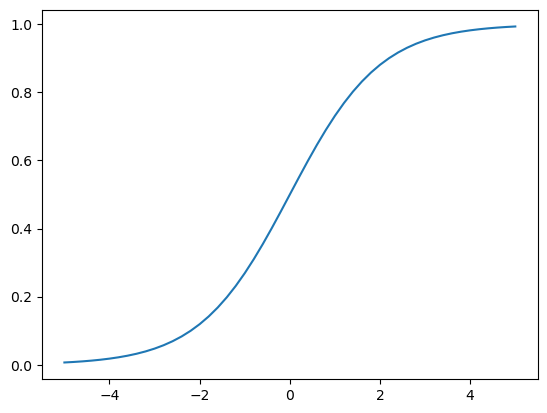

In [45]:
plt.plot(num,sigmoid(num))

#

## Training Logistic regression with Scikit-Learn

- Train the model
- Apply to the validation dataset
- calculate the accuracy

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
model = LogisticRegression()
model.fit(X_train,y_train)

/home/purushothamad/anaconda3/envs/ml-zoomcamp/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [48]:
# bias or intercept
w0 = model.intercept_[0]

In [49]:
#weights
w1 = model.coef_[0].round(3)

In [50]:
model.predict_proba(X_train) # this is probability

array([[0.90374003, 0.09625997],
       [0.32056189, 0.67943811],
       [0.36596352, 0.63403648],
       ...,
       [0.46816261, 0.53183739],
       [0.9571503 , 0.0428497 ],
       [0.3015505 , 0.6984495 ]], shape=(4225, 2))

In [51]:
y_pred = model.predict_proba(X_val)[:,1]
y_pred

array([0.00909687, 0.20534683, 0.21317495, ..., 0.13737149, 0.79936702,
       0.83678524], shape=(1409,))

In [52]:
churn_decision = (y_pred>=0.5)
churn_decision

array([False, False, False, ..., False,  True,  True], shape=(1409,))

In [53]:
# for this we use accuracy to see how good is our model

df_pred = pd.DataFrame()
df_pred['probability_churn'] = y_pred
df_pred['predicted_churn'] = churn_decision.astype(int)

df_pred['actual_churn']=y_val

In [54]:
df_pred['correct']= (df_pred['predicted_churn']== df_pred['actual_churn'])

In [55]:
df_pred['correct'].mean()

np.float64(0.8026969481902059)

In [56]:
# in other way
(y_val == churn_decision).mean()

np.float64(0.8026969481902059)

## Model Interpretation

#### Lets train a small model with less features

In [57]:
#train smaller model with few features

small = ['contract','tenure','monthlycharges']

In [58]:
dict_train_small = df_train[small].to_dict(orient='records')

dict_val_small = df_val[small].to_dict(orient = 'records')

In [59]:
dv_small = DictVectorizer(sparse=False)

In [60]:
X_train_small = dv_small.fit_transform(dict_train_small)

In [61]:
dv_small.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'monthlycharges', 'tenure'], dtype=object)

In [62]:
model_small = LogisticRegression()
model_small.fit(X_train_small,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [63]:
w0 = model_small.intercept_[0]

In [64]:
w = model_small.coef_[0].round(3)

In [65]:
w

array([ 0.971, -0.024, -0.948,  0.027, -0.036])

In [66]:
dict(zip(dv_small.get_feature_names_out(),w))

{'contract=month-to-month': np.float64(0.971),
 'contract=one_year': np.float64(-0.024),
 'contract=two_year': np.float64(-0.948),
 'monthlycharges': np.float64(0.027),
 'tenure': np.float64(-0.036)}

#### Note that the lesser the weight then out probibility of churn decreases

## Using the model

In [67]:
dict_full_train = df_full_train[categorical+numerical].to_dict(orient = 'records')

In [68]:
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dict_full_train)

In [69]:
y_full_tain = df_full_train['churn']

In [71]:
model = LogisticRegression()

model.fit(X_full_train,y_full_tain)

/home/purushothamad/anaconda3/envs/ml-zoomcamp/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [73]:
dict_test = df_test[categorical + numerical].to_dict(orient = 'records')

In [74]:
X_test = dv.transform(dict_test)

In [75]:
y_pred = model.predict_proba(X_test)

In [76]:
y_pred = y_pred[:,1]

In [77]:
churn_decision = (y_pred >= 0.5)

In [79]:
test_accuracy = (churn_decision == y_test).mean()

In [81]:
print(f'test_accuracy is {test_accuracy:%}')

test_accuracy is 81.334280%


#### Test using any customer

In [91]:
customer = dict_test[12]
customer

{'gender': 'female',
 'seniorcitizen': 1,
 'partner': 'no',
 'dependents': 'no',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'no',
 'onlinebackup': 'no',
 'deviceprotection': 'no',
 'techsupport': 'no',
 'streamingtv': 'no',
 'streamingmovies': 'no',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 3,
 'monthlycharges': 70.3,
 'totalcharges': 235.5}

In [92]:
X_customer = dv.transform([customer])

In [97]:
y_pred = model.predict_proba(X_customer)[:,1]
churn_decision = (y_pred >= 0.5)
churn_decision.astype(int)
                 

array([1])

## Summary

- Feature importance - risk, mutual information, correlation
- One hot encoding implemented with **DictVectorizer**
- Logistic Regression
- Implementation of weights